I really want to get a workign version with only price for comparison on how much the other stuff actually helps

In [34]:
import requests
import json
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
np.random.seed(0)
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import concat

from math import sqrt
from numpy import concatenate

from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [113]:
teslaDataset = pd.read_csv('google_dataset_2.csv') 

In [114]:
teslaDataset

,google,change_buy,price_buy,count_buy,change_sale,price_sale,count_sale,sp500
0,1.442496,0.0,0.0,0.0,0.0,0.0,0.0,0.367361
1,0.633516,0.0,0.0,0.0,0.0,0.0,0.0,0.644049
2,1.281331,0.0,0.0,0.0,0.0,0.0,0.0,0.417317
3,0.374597,0.0,0.0,0.0,0.0,0.0,0.0,0.372590
4,0.074013,0.0,0.0,0.0,0.0,0.0,0.0,0.088731
...,...,...,...,...,...,...,...,...
100,0.302326,0.0,0.0,0.0,0.0,0.0,0.0,0.711953
101,0.911641,0.0,0.0,0.0,0.0,0.0,0.0,1.218188
102,-0.423587,0.0,0.0,0.0,0.0,0.0,0.0,-0.631359
103,-2.121898,0.0,0.0,0.0,0.0,0.0,0.0,-1.577600


there might be something we can do with scaling to improve linear regression, but it also might just be a bust. 

In [136]:
#trying a linear regression. data may still be in a terrible form 
tesla_copy = teslaDataset.copy()
tesla_c = tesla_copy[['google', 'sp500']]
train = tesla_c .iloc[:80,:]
test = tesla_c .iloc[80:,:]

In [137]:
X_train = train.drop(['google'], axis = 1)
y_train = train[["google"]]

X_test = test.drop(['google'], axis = 1)
y_test = test[["google"]]

In [138]:
reg = LinearRegression().fit(X_train, y_train)
train = reg.score(X_train, y_train)
test = reg.score(X_test, y_test)#this is R squared

In [139]:
print("train R2:", train)
print("test R2:", test)
#fill na to zero probs to blame. Not enough data???


train R2: 0.675340731064768
test R2: 0.7826927108950984


In [140]:
y_test = y_test.reset_index(drop=True)

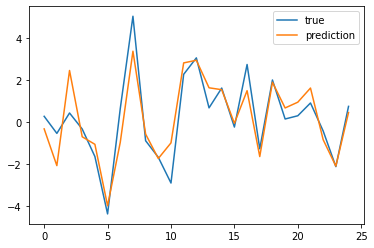

In [141]:
pred = reg.predict(X_test)
pyplot.plot(y_test, label='true')
pyplot.plot( pred, label='prediction')
pyplot.legend()
pyplot.show()

In [142]:
sqrt(mean_squared_error(y_test, pred))

0.9166542616377003

In [143]:
#quick attempt at lstm

In [144]:
tesla_copy

,google,change_buy,price_buy,count_buy,change_sale,price_sale,count_sale,sp500
0,1.442496,0.0,0.0,0.0,0.0,0.0,0.0,0.367361
1,0.633516,0.0,0.0,0.0,0.0,0.0,0.0,0.644049
2,1.281331,0.0,0.0,0.0,0.0,0.0,0.0,0.417317
3,0.374597,0.0,0.0,0.0,0.0,0.0,0.0,0.372590
4,0.074013,0.0,0.0,0.0,0.0,0.0,0.0,0.088731
...,...,...,...,...,...,...,...,...
100,0.302326,0.0,0.0,0.0,0.0,0.0,0.0,0.711953
101,0.911641,0.0,0.0,0.0,0.0,0.0,0.0,1.218188
102,-0.423587,0.0,0.0,0.0,0.0,0.0,0.0,-0.631359
103,-2.121898,0.0,0.0,0.0,0.0,0.0,0.0,-1.577600


In [145]:
#this creates the sequence
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [147]:
tesla_values = tesla_copy.values

In [148]:
tesla_values = tesla_values.astype('float32')
# normalize features

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(tesla_values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.048286       -1.0       -1.0       -1.0        1.0       -1.0   
2  -0.087667       -1.0       -1.0       -1.0        1.0       -1.0   
3   0.021202       -1.0       -1.0       -1.0        1.0       -1.0   
4  -0.131179       -1.0       -1.0       -1.0        1.0       -1.0   
5  -0.181694       -1.0       -1.0       -1.0        1.0       -1.0   

   var7(t-1)  var8(t-1)   var1(t)  var2(t)  var3(t)  var4(t)  var5(t)  \
1       -1.0   0.215699 -0.087667     -1.0     -1.0     -1.0      1.0   
2       -1.0   0.315708  0.021202     -1.0     -1.0     -1.0      1.0   
3       -1.0   0.233756 -0.131179     -1.0     -1.0     -1.0      1.0   
4       -1.0   0.217589 -0.181694     -1.0     -1.0     -1.0      1.0   
5       -1.0   0.114988 -0.205726     -1.0     -1.0     -1.0      1.0   

   var6(t)  var7(t)   var8(t)  
1     -1.0     -1.0  0.315708  
2     -1.0     -1.0  0.233756  
3     -1.0     -1.0  0.217589  
4     

In [149]:
values = reframed.values

In [150]:
values.shape


(104, 16)

In [156]:
values = reframed.values
n_train_hours = 80
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(80, 1, 15) (80,) (24, 1, 15) (24,)


Epoch 1/60
6/6 - 9s - loss: 0.1705 - val_loss: 0.2705 - 9s/epoch - 2s/step
Epoch 2/60
6/6 - 0s - loss: 0.1692 - val_loss: 0.2670 - 68ms/epoch - 11ms/step
Epoch 3/60
6/6 - 0s - loss: 0.1684 - val_loss: 0.2643 - 69ms/epoch - 11ms/step
Epoch 4/60
6/6 - 0s - loss: 0.1680 - val_loss: 0.2622 - 63ms/epoch - 11ms/step
Epoch 5/60
6/6 - 0s - loss: 0.1679 - val_loss: 0.2609 - 56ms/epoch - 9ms/step
Epoch 6/60
6/6 - 0s - loss: 0.1679 - val_loss: 0.2603 - 57ms/epoch - 9ms/step
Epoch 7/60
6/6 - 0s - loss: 0.1679 - val_loss: 0.2601 - 50ms/epoch - 8ms/step
Epoch 8/60
6/6 - 0s - loss: 0.1679 - val_loss: 0.2602 - 56ms/epoch - 9ms/step
Epoch 9/60
6/6 - 0s - loss: 0.1678 - val_loss: 0.2604 - 55ms/epoch - 9ms/step
Epoch 10/60
6/6 - 0s - loss: 0.1678 - val_loss: 0.2606 - 61ms/epoch - 10ms/step
Epoch 11/60
6/6 - 0s - loss: 0.1678 - val_loss: 0.2607 - 56ms/epoch - 9ms/step
Epoch 12/60
6/6 - 0s - loss: 0.1678 - val_loss: 0.2608 - 53ms/epoch - 9ms/step
Epoch 13/60
6/6 - 0s - loss: 0.1678 - val_loss: 0.2609 - 55m

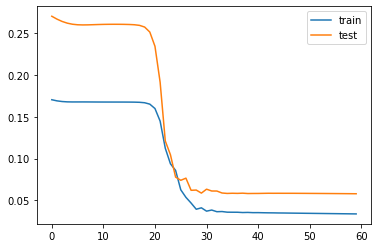

In [157]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))

model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=15, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [158]:
yhat = model.predict(test_X)#y_pred #just cant do this line twice?
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [159]:
#train 
y_train_pred = model.predict(train_X)#y_pred #just cant do this line twice?
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
r2_score(train_y, y_train_pred )

0.8038507948438804

In [160]:
#test
r2_score(test_y, yhat)


0.7724480232850816

In [161]:
#rmse
sqrt(mean_squared_error(test_y, yhat))

0.2408342006295393

In [162]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:8]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]


In [163]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [164]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:8]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [165]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.433


In [166]:
r2_score(inv_y,inv_yhat)

0.7724480180921053

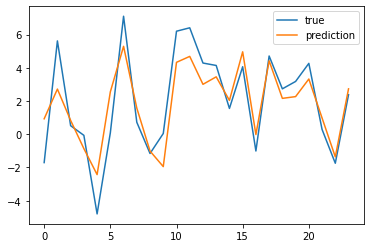

In [167]:
pyplot.plot(inv_y, label='true')
pyplot.plot(inv_yhat, label='prediction')
pyplot.legend()
pyplot.show()

In [168]:
tesla_values = tesla_copy[['google', 'sp500' ]].values # , 'sp500' ,'count_buy', 'count_sale'

tesla_values = tesla_values.astype('float32')
# normalize features
#tesla_values = tesla_values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(tesla_values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict

print(reframed.head())

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.048286   0.215699 -0.087667  0.315708
2  -0.087667   0.315708  0.021202  0.233756
3   0.021202   0.233756 -0.131179  0.217589
4  -0.131179   0.217589 -0.181694  0.114988
5  -0.181694   0.114988 -0.205726 -0.043767


In [173]:
values = reframed.values
n_train_hours = 80
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(80, 1, 3) (80,) (24, 1, 3) (24,)


Epoch 1/60
6/6 - 7s - loss: 0.1705 - val_loss: 0.2701 - 7s/epoch - 1s/step
Epoch 2/60
6/6 - 0s - loss: 0.1691 - val_loss: 0.2664 - 55ms/epoch - 9ms/step
Epoch 3/60
6/6 - 0s - loss: 0.1682 - val_loss: 0.2635 - 51ms/epoch - 9ms/step
Epoch 4/60
6/6 - 0s - loss: 0.1678 - val_loss: 0.2613 - 56ms/epoch - 9ms/step
Epoch 5/60
6/6 - 0s - loss: 0.1677 - val_loss: 0.2599 - 63ms/epoch - 10ms/step
Epoch 6/60
6/6 - 0s - loss: 0.1675 - val_loss: 0.2588 - 62ms/epoch - 10ms/step
Epoch 7/60
6/6 - 0s - loss: 0.1671 - val_loss: 0.2577 - 47ms/epoch - 8ms/step
Epoch 8/60
6/6 - 0s - loss: 0.1662 - val_loss: 0.2557 - 57ms/epoch - 9ms/step
Epoch 9/60
6/6 - 0s - loss: 0.1642 - val_loss: 0.2513 - 54ms/epoch - 9ms/step
Epoch 10/60
6/6 - 0s - loss: 0.1598 - val_loss: 0.2418 - 51ms/epoch - 8ms/step
Epoch 11/60
6/6 - 0s - loss: 0.1506 - val_loss: 0.2220 - 53ms/epoch - 9ms/step
Epoch 12/60
6/6 - 0s - loss: 0.1327 - val_loss: 0.1854 - 51ms/epoch - 8ms/step
Epoch 13/60
6/6 - 0s - loss: 0.1042 - val_loss: 0.1299 - 79ms/

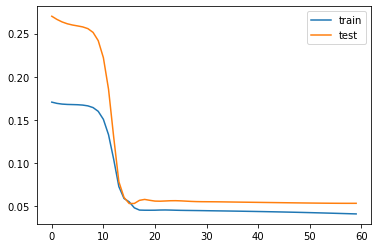

In [174]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=15, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [175]:
yhat = model.predict(test_X)#y_pred #just cant do this line twice?
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


In [176]:
y_train_pred = model.predict(train_X)#y_pred #just cant do this line twice?
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
r2_score(train_y, y_train_pred )

0.757808838829932

In [177]:
r2_score(test_y, yhat)

0.7911488939614014

In [178]:
inv_yhat.shape

(24,)

In [179]:
inv_yhat = concatenate((yhat, test_X[:, 1:2]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]

In [180]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [181]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:2]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [182]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.373


In [183]:
r2_score(inv_y,inv_yhat)

0.7911488833940482

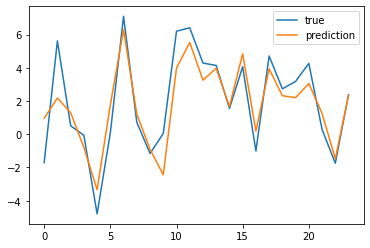

In [184]:
pyplot.plot(inv_y, label='true')
pyplot.plot(inv_yhat, label='prediction')
pyplot.legend()
pyplot.show()